# Surprise Housing

***
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.
 
The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

> Which variables are significant in predicting the price of a house, and

> How well those variables describe the price of a house.

 
- We will also need to determine the optimal value of lambda for ridge and lasso regression.


***
#### Business Goal 

It is required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

***
## 1. Data Preparation
***

#### Importing the basic libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

#### Importing the dataset

In [2]:
df = pd.read_csv('train.csv',encoding='ISO-8859-1')
df.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [3]:
print(df.shape)
print('Numrical Columns - ', len(df.describe().columns) - 2 ) # Excluding the Id and Target variables
print('Categorical Columns - ', len(df.columns) - len(df.describe().columns))


(1460, 81)
Numrical Columns -  36
Categorical Columns -  43


#### Dataset interpretation 
- The dataset contains 1460 datapoints with 81 columns. 
- The 'SalePrice' is the target variable
- One Index/Sequencing fields - 'Id'
- 36 Numerical features including 4 'Year' (datetime) fields
- 43 Categorical features

***
##  2. Data Cleansing
***

### Missing Value treatment

In [4]:
# Analysing the percentage of missing values in each field for  dataset
nullpct = round((df.isnull().sum() /len(df) * 100),2)
# Lisiting out all column with missing value
print(pd.DataFrame(nullpct.loc[nullpct > 0]))

                  0
LotFrontage   17.74
Alley         93.77
MasVnrType     0.55
MasVnrArea     0.55
BsmtQual       2.53
BsmtCond       2.53
BsmtExposure   2.60
BsmtFinType1   2.53
BsmtFinType2   2.60
Electrical     0.07
FireplaceQu   47.26
GarageType     5.55
GarageYrBlt    5.55
GarageFinish   5.55
GarageQual     5.55
GarageCond     5.55
PoolQC        99.52
Fence         80.75
MiscFeature   96.30


***
#### Notes 

- We have very limited dataset with 1460 records and hence dropping records would not be wise
- As per the Data Defintion, N/A is mentioned as the item Not Available but we have NaN (Null) in the field values which represents NULL, hence if we convert the missing value into a new category where large number of values are null then it will introduce **high bias** into the model
- The below fields can be safely dropped without Imputing any values for very high percentage proportion of missing value 
> - Alley
> - FireplaceQu
> - PoolQC
> - Fence
> - MiscFeature
> - Id 
***

In [5]:
cols_to_drop = ['Id', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature' ]
df = df.drop(cols_to_drop,axis=1)
print('Shape of data = ', df.shape)
df.head(2)

Shape of data =  (1460, 75)


MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   

  Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0    AllPub    Inside       Gtl  ...             0         0           0   
1    AllPub       FR2       Gtl  ...             0         0           0   

  PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
0        0       0       2    2008        WD         Normal    208500  
1        0       0       5    2007        WD         Normal    181500  

[2 rows x 75 columns]

In [6]:
# Analysing the misssing values after dropping the columns 
nullpct = round((df.isnull().sum() /len(df) * 100),2)
nullpct_df = pd.DataFrame(nullpct.loc[nullpct > 0])

In [7]:
# Find the Numerical columns with Missin value 
null_index = list(nullpct_df.index)
ncol = list(df.describe().columns)
n_null_col = [c for c in null_index if c in ncol  ]
cat_null_col = [c for c in null_index if c not in  ncol  ]

- Numerical & Categorical features

In [8]:
print('Numerical columns with missing value- \n', n_null_col, '\n')

print('Categorical columns with missing value- \n ', cat_null_col)

Numerical columns with missing value- 
 ['LotFrontage', 'MasVnrArea', 'GarageYrBlt'] 

Categorical columns with missing value- 
  ['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']


***
> - Taking cue from Data Definiton, We will impute the missing values in the Categorical columns with a new category of Not Available, For Eg. if GarageCond has NaN, Based on the information available in the Data Definition, We can assume that the house does not have a Garage given that number of such records are not large
> - Filling NaN with Not available category will be to ensure we do not introduce much bias and still retain the all the records 

In [9]:
df[['BsmtQual']] =  df[['BsmtQual']].fillna(value='NoBasement')
df[['BsmtCond']] =  df[['BsmtCond']].fillna(value='NoBasement')
df[['BsmtExposure']] =  df[['BsmtExposure']].fillna(value='NoBasement')
df[['BsmtFinType1']] =  df[['BsmtFinType1']].fillna(value='NoBasement')
df[['BsmtFinType2']] =  df[['BsmtFinType2']].fillna(value='NoBasement')
df[['GarageType']] =  df[['GarageType']].fillna(value='NoGarage')
df[['GarageFinish']] =  df[['GarageFinish']].fillna(value='NoGarage')
df[['GarageQual']] =  df[['GarageQual']].fillna(value='NoGarage')
df[['GarageCond']] =  df[['GarageCond']].fillna(value='NoGarage')

In [10]:
# Analysing te misssing values after dropping the columns 
nullpct = round((df.isnull().sum() /len(df) * 100),2)
nullpct_df = pd.DataFrame(nullpct.loc[nullpct > 0])
nullpct_df

0
LotFrontage  17.74
MasVnrType    0.55
MasVnrArea    0.55
Electrical    0.07
GarageYrBlt   5.55

- We are left with 2 numerical variable, 3 categorical variable including GarageYrBlt. 
- For catrgorical variable, we will impute mode value to retain the records 
- For numerical variable, We will imput median value given the high skewness present in the features

***
- Imputing in the Categorical Features

In [11]:
# We will impute the mode in below three categorical columns where few records have missing value
cols = ['MasVnrType', 'Electrical','GarageYrBlt']
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values =np.nan, strategy = 'most_frequent')
imputer = imputer.fit(df[cols])
df[cols] = imputer.transform(df[cols])

- Imputing in Numerical features

In [12]:
#Let's plot the numerical variables to identify the distribution
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.distplot(df['LotFrontage'])
plt.subplot(2,3,2)
sns.distplot(df['MasVnrArea'])
plt.subplot(2,3,3)
sns.distplot(df['GarageYrBlt'])
plt.show()

- We can clearly see that all three feature variables are skewed in the distribution and therefore median would be the best choice for imputing missing values

In [13]:
imputer = SimpleImputer(missing_values =np.nan, strategy = 'median')
imputer = imputer.fit(df[['LotFrontage','MasVnrArea']])
df[['LotFrontage','MasVnrArea']] = imputer.transform(df[['LotFrontage','MasVnrArea']])

- Lets verify if there any further columns with missing data

In [14]:
# Analysing te misssing values again 
nullpct = round((df.isnull().sum() /len(df) * 100),2)
nullpct_df = pd.DataFrame(nullpct.loc[nullpct > 0])
nullpct_df

Empty DataFrame
Columns: [0]
Index: []

- There no coloumn left with missing values so we are done here with Data Cleansing.

***
## 3. Data Encoding

In [15]:
# Understanding the Datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

> We need to ensure the dtype for categorical varibale is Object and for numerical variables it is int64/float64
> Following columns will be re-mapped to a string value based on the information provided in the data definition

### Remapping Features

- Mapping the MSSubClass, MoSold, OverallQual and OverallCond from numerical values to categories as per Data Defintion

In [16]:
df['MoSold']=df.MoSold.map({1:'Jan',2:'Feb',3:'Mar',
                            4:'Apr',5:'May',6:'June',
                            7:'July',8:'Aug',9:'Sep',
                            10:'Oct',11:'Nov',12:'Dec'})
df['OverallQual']=df.OverallQual.map({1:'VeryPoor',2:'Poor',3:'Fair',4:'BelowAverage',5:'Average',
                                      6:'AboveAverage',7:'Good',8:'VeryGood',9:'Excellent',10:'VeryExcellent'})
df['OverallCond']=df.OverallCond.map({1:'VeryPoor',2:'Poor',3:'Fair',4:'BelowAverage',5:'Average',
                                      6:'AboveAverage',7:'Good',8:'VeryGood',9:'Excellent',10:'VeryExcellent'})

- The feature 'MSSubClass' is categorical variables but have numerical values with dtype as int64

In [17]:
print(type(df['MSSubClass'][0]))
df['MSSubClass'].head(5)

<class 'numpy.int64'>


0    60
1    20
2    60
3    70
4    60
Name: MSSubClass, dtype: int64

In [18]:
# Lets convert the dtype of the column to object which can save from remapping the values to string 
df['MSSubClass']=df.MSSubClass.astype("object")
print((df['MSSubClass']))

0       60
1       20
2       60
3       70
4       60
        ..
1455    60
1456    20
1457    70
1458    20
1459    20
Name: MSSubClass, Length: 1460, dtype: object


***
### Derived metrics

- We are left with 4 features which are numeric in data-type but represents the Year (datetime). We will derive a new metric called 'Age' for each feature having numerical values. This will save us from either binning or converting the Year feature variables into dummy variables  
> 1. 'YearBuilt',
> 2. 'YearRemodAdd'
> 3. 'GarageYrBlt'
> 4. 'YrSold'

- On closer look, The maximum value for each of the field is exactly same as 2010. We will use this to compute the value as numeric difference between the 2010 and value of year in each column to compute the Age  
***

In [19]:
print('Max YearBuilt = ',  df['YearBuilt'].max(), 
      '\nMax YearRemodAdd = ',df['YearRemodAdd'].max(), 
      '\nMax GarageYrBlt = ',df['GarageYrBlt'].max(), 
      '\nMax YrSold = ',df['YrSold'].max())

Max YearBuilt =  2010 
Max YearRemodAdd =  2010 
Max GarageYrBlt =  2010.0 
Max YrSold =  2010


- Calculating a new derived metrics and adding it to the master dataframe

In [20]:
df['YearBuilt_Age'] = df['YearBuilt'].max() - df['YearBuilt'] 
df['YearRemodAdd_Age'] = df['YearRemodAdd'].max() - df['YearRemodAdd'] 
df['GarageYrBlt_Age'] = (df['GarageYrBlt'].max() - df['GarageYrBlt']).astype("int64")
df['YrSold_Age'] = df['YrSold'].max() - df['YrSold'] 

In [21]:
# Review the Year columns in the dataset
years = ['YearBuilt','YearBuilt_Age', 'YearRemodAdd','YearRemodAdd_Age', 'GarageYrBlt','GarageYrBlt_Age', 'YrSold','YrSold_Age' ]
df[years]

YearBuilt  YearBuilt_Age  YearRemodAdd  YearRemodAdd_Age  GarageYrBlt  \
0          2003              7          2003                 7       2003.0   
1          1976             34          1976                34       1976.0   
2          2001              9          2002                 8       2001.0   
3          1915             95          1970                40       1998.0   
4          2000             10          2000                10       2000.0   
...         ...            ...           ...               ...          ...   
1455       1999             11          2000                10       1999.0   
1456       1978             32          1988                22       1978.0   
1457       1941             69          2006                 4       1941.0   
1458       1950             60          1996                14       1950.0   
1459       1965             45          1965                45       1965.0   

      GarageYrBlt_Age  YrSold  YrSold_Age  
0                   7    2008           2  
1                  34    2007           3  
2                   9    2008           2  
3                  12    2006           4  
4                  10    2008           2  
...               ...     ...         ...  
1455               11    2007           3  
1456               32    2010           0  
1457               69    2010           0  
1458               60    2010           0  
1459               45    2008           2  

[1460 rows x 8 columns]

- Removing the original features from master dataframe

In [22]:
cols_to_drop = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']
df = df.drop(cols_to_drop,axis=1)
print('Shape of data = ', df.shape)
df.tail(2)

Shape of data =  (1460, 75)


MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
1458         20       RL         68.0     9717   Pave      Reg         Lvl   
1459         20       RL         75.0     9937   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope  ... PoolArea MiscVal MoSold SaleType  \
1458    AllPub    Inside       Gtl  ...        0       0    Apr       WD   
1459    AllPub    Inside       Gtl  ...        0       0   June       WD   

     SaleCondition SalePrice YearBuilt_Age YearRemodAdd_Age GarageYrBlt_Age  \
1458        Normal    142125            60               14              60   
1459        Normal    147500            45               45              45   

     YrSold_Age  
1458          0  
1459          2  

[2 rows x 75 columns]

### Correlated Features

In [23]:
dfc = df.copy()
dfc_m = dfc.drop('SalePrice',axis=1)
numeric = dfc_m.select_dtypes(include=['float64', 'int64'])
num_cols = list(numeric.columns)
dfc_corr = dfc[num_cols]

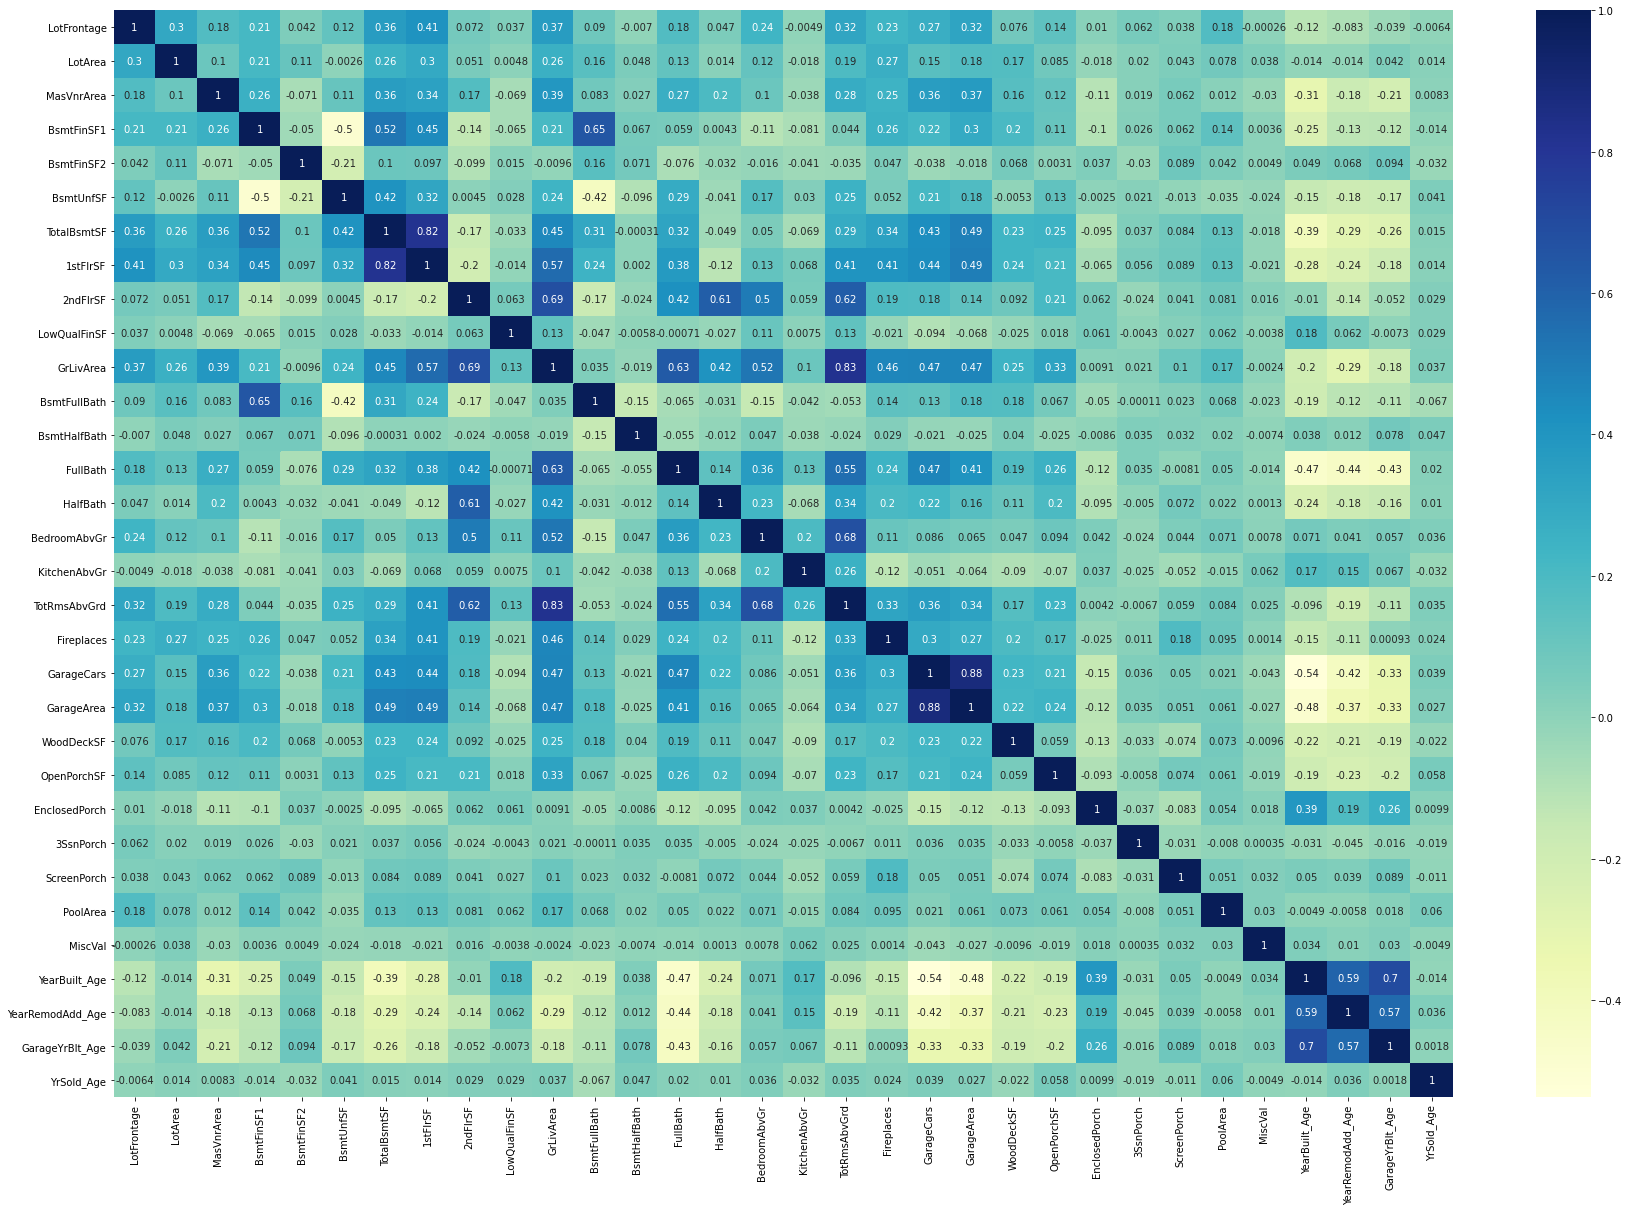

In [24]:
#print(upper[to_drop].corr())
plt.figure(figsize = (30,20))
sns.heatmap(dfc_corr.corr(),annot = True,cmap="YlGnBu")
plt.show()

In [25]:
#cols_to_drop = ['1stFlrSF', 'GrLivArea', 'GarageArea']
#df = df.drop(cols_to_drop,axis=1)
print('Shape of data = ', df.shape)

Shape of data =  (1460, 75)


***
### Dummy Variable Encoding 

 - Converting the categorical variables into dummy variables 


In [26]:
# Filter out the features are either object or category datatype 
df_categorical = df.select_dtypes(include=['object', 'category'])
df_cat_cols = list(df_categorical.columns)

In [27]:
# Using pandas get_dummies feature for One Hot encoding
data = pd.get_dummies(data=df,columns = df_cat_cols, drop_first=True)
data.head(5)

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         65.0     8450       196.0         706           0        150   
1         80.0     9600         0.0         978           0        284   
2         68.0    11250       162.0         486           0        434   
3         60.0     9550         0.0         216           0        540   
4         84.0    14260       350.0         655           0        490   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  ...  SaleType_ConLI  \
0          856       856       854             0  ...               0   
1         1262      1262         0             0  ...               0   
2          920       920       866             0  ...               0   
3          756       961       756             0  ...               0   
4         1145      1145      1053             0  ...               0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
4               0             0             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 280 columns]

- Now we have the modified dataset after dummy variable encoding of categorical features 


### Data Transforming - Target Variable 

- Let's analyse the Target variable for its values, distribution and skewness

Skewness: 1.882876


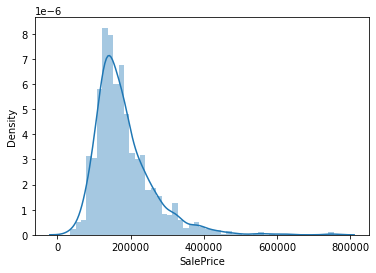

In [28]:
print("Skewness: %f" % df['SalePrice'].skew())
sns.distplot(df['SalePrice'])
plt.show()

- We can see that the Sale Price taret variable is left skewed with outliers reaching out to 4 times the mean value
- Further As we can see that our target variable ranges in values (thousands) very higher than the feature variables which have values between 0 - 100
>- It would be better if we log transform the Sale Price to bring it in the similar scale of feature variables and adjust its distribution as normal as possible

<function matplotlib.pyplot.show(close=None, block=None)>

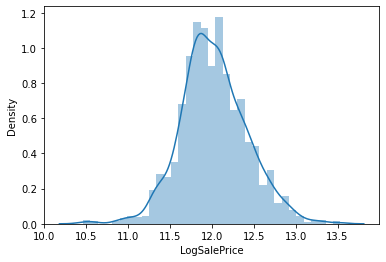

In [29]:
data['LogSalePrice'] = np.log(data['SalePrice'])
#data[['SalePrice','LogSalePrice']]
sns.distplot(data['LogSalePrice'])
plt.show

- The transformed target variables as very normal without much skew left 

***
## 4. Matrix of Features and Target variable

In [30]:
# Splitting the dataset into Matrix of Features and Target Variable  
y = data['LogSalePrice']
X = data.drop(['SalePrice', 'LogSalePrice'],axis=1)

## 5. Feature Scaling 
- We will be using MinMaxScaler to scale the numerical features. 

In [31]:
X_numeric = X.select_dtypes(include=['float64', 'int64'])
X_num_cols = list(X_numeric.columns)

In [32]:
# Scaling the data between 0 and 1
from sklearn.preprocessing import MinMaxScaler
# Created a scaler object
scaler = MinMaxScaler()
X[X_num_cols] = scaler.fit_transform(X[X_num_cols])

- Let's verify the feature matrix after MinMax scaling

In [33]:
X.describe()

LotFrontage      LotArea   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean      0.167341     0.043080     0.064448     0.078604     0.031580   
std       0.075437     0.046653     0.112957     0.080811     0.109443   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.133562     0.029229     0.000000     0.000000     0.000000   
50%       0.164384     0.038227     0.000000     0.067948     0.000000   
75%       0.198630     0.048150     0.102656     0.126196     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  ...  \
count  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000  ...   
mean      0.242826     0.173065     0.190139     0.168035      0.010218  ...   
std       0.189155     0.071801     0.088708     0.211394      0.085005  ...   
min       0.000000     0.000000     0.000000     0.000000      0.000000  ...   
25%       0.095462     0.130237     0.125746     0.000000      0.000000  ...   
50%       0.204409     0.162275     0.172786     0.000000      0.000000  ...   
75%       0.345890     0.212480     0.242600     0.352542      0.000000  ...   
max       1.000000     1.000000     1.000000     1.000000      1.000000  ...   

       SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  \
count     1460.000000     1460.000000   1460.000000   1460.000000   
mean         0.003425        0.003425      0.083562      0.002055   
std          0.058440        0.058440      0.276824      0.045299   
min          0.000000        0.000000      0.000000      0.000000   
25%          0.000000        0.000000      0.000000      0.000000   
50%          0.000000        0.000000      0.000000      0.000000   
75%          0.000000        0.000000      0.000000      0.000000   
max          1.000000        1.000000      1.000000      1.000000   

       SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
count  1460.000000            1460.000000           1460.000000   
mean      0.867808               0.002740              0.008219   
std       0.338815               0.052289              0.090317   
min       0.000000               0.000000              0.000000   
25%       1.000000               0.000000              0.000000   
50%       1.000000               0.000000              0.000000   
75%       1.000000               0.000000              0.000000   
max       1.000000               1.000000              1.000000   

       SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
count           1460.000000           1460.000000            1460.000000  
mean               0.013699              0.820548               0.085616  
std                0.116277              0.383862               0.279893  
min                0.000000              0.000000               0.000000  
25%                0.000000              1.000000               0.000000  
50%                0.000000              1.000000               0.000000  
75%                0.000000              1.000000               0.000000  
max                1.000000              1.000000               1.000000  

[8 rows x 279 columns]

## 6. Splitting the dataset into Training and Test set

In [34]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

## 7. Modeling & Feature Selection 
***

- Lets start with building a Multiple Linear Regression with training and test dataset


## 7.1 Linear Model 

In [35]:
# Importing RFE and LinearRegression from sklearn 
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

- Since we have lot of predictor variables, Understanding the behaviour of each feature with the target variable will be very cumbersome, therefore we will use Recursive Feature Elimintation to select top 30 predictor variables and apply Linear Model 

In [36]:
# Lets refine the model to select top 30 significant predictor variables using RFE and we will allow Ridge and Lasso 
# to find out the significant variables 
lm = LinearRegression() 
lm.fit(X_train, y_train)  
rfe = RFE(lm, 30)           
rfe = rfe.fit(X_train, y_train)

- RFE to select top 30 features from the Model using automatated method
- Let's verify the Support and Ranking of the Variables in X_train

In [37]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 63),
 ('LotArea', True, 1),
 ('MasVnrArea', False, 81),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 11),
 ('BsmtUnfSF', False, 12),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 10),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 71),
 ('BsmtHalfBath', False, 220),
 ('FullBath', False, 110),
 ('HalfBath', False, 173),
 ('BedroomAbvGr', False, 188),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', False, 230),
 ('Fireplaces', False, 50),
 ('GarageCars', False, 80),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 61),
 ('OpenPorchSF', False, 107),
 ('EnclosedPorch', False, 101),
 ('3SsnPorch', False, 88),
 ('ScreenPorch', False, 68),
 ('PoolArea', False, 125),
 ('MiscVal', False, 73),
 ('YearBuilt_Age', True, 1),
 ('YearRemodAdd_Age', False, 4),
 ('GarageYrBlt_Age', False, 237),
 ('YrSold_Age', False, 210),
 ('MSSubClass_30', False, 52),
 ('MSSubClass_40', False, 117),
 ('MSSubClass_45', False, 43),
 ('MS

In [38]:
# List of predictors with rfe_support as True
X_train.columns[rfe.support_]

Index(['LotArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'KitchenAbvGr', 'GarageArea', 'YearBuilt_Age',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'LandSlope_Sev', 'Neighborhood_MeadowV', 'Condition2_PosN',
       'Condition2_RRAe', 'OverallQual_Poor', 'OverallCond_Fair',
       'RoofStyle_Shed', 'RoofMatl_CompShg', 'RoofMatl_Membran',
       'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv',
       'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_BrkComm',
       'Foundation_Wood', 'Functional_Sev'],
      dtype='object')

- **We will not be doing any further feature selection manually or by RFE, Forward/Backward Elimination Or VIF and allow Regularization techniques to try to shrink the Beta values of non-significant features closer to Zero.** 

#### RFE dataset - Train & Test

In [39]:
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]
X_test_rfe = X_test[col]

#### Rebuilding the model using RFE dataset 

- Measuring the performance of the Model using R-Sq, MSE , RMSE on training and test dataset 

In [40]:
# Rebuild the linear model using RFE training dataset
lm = LinearRegression() 
lm.fit(X_train_rfe, y_train)  

LinearRegression()

- Measuring the performance of Linear Model on training and test dataset 

In [41]:
from sklearn.metrics import r2_score, mean_squared_error
y_pred_train = lm.predict(X_train_rfe)
y_pred_test = lm.predict(X_test_rfe)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R-sq_train_lr - ',r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R-sq_test_lr - ', r2_test_lr)
metric.append(r2_test_lr)

print('\n')
rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS_train_lr - ', rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS_test_lr - ', rss2_lr)
metric.append(rss2_lr)

print('\n')
mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE_train_lr - ', mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE_test_lr - ', mse_test_lr)
metric.append(mse_test_lr**0.5)

R-sq_train_lr -  0.8814062785948529
R-sq_test_lr -  0.7739543304641924


RSS_train_lr -  19.033372270941694
RSS_test_lr -  16.290788393060346


MSE_train_lr -  0.018641892527856703
MSE_test_lr -  0.03719358080607385


#### Linear Model - Performance metrics 
- The R-Square value between training and test data is significantly different. This represents **HIGH VARIANCE**
- RSS for test dataset is lower than training set 
- MSE although again higher for test dataset. 

> We can say that model is not performing very well on the test data set 

#### Residual Analysis of Linear Model 

In [42]:
# Residual analysis
y_res_train = y_train - y_pred_train
y_res_test = y_test - y_pred_test

#### Normality of Error terms 

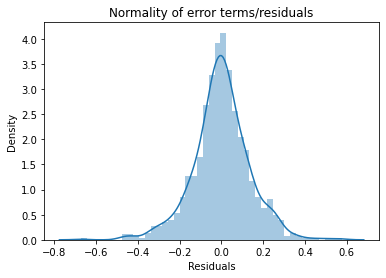

In [43]:
# Distribution of errors
p = sns.distplot(y_res_train,kde=True)
p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

- The Error terms are normally distributed across Zero value which confirms that relationship between predictor variable and target variable is linear

#### Homoscedasticity,  Independence of Error terms and Multivariate Normality 

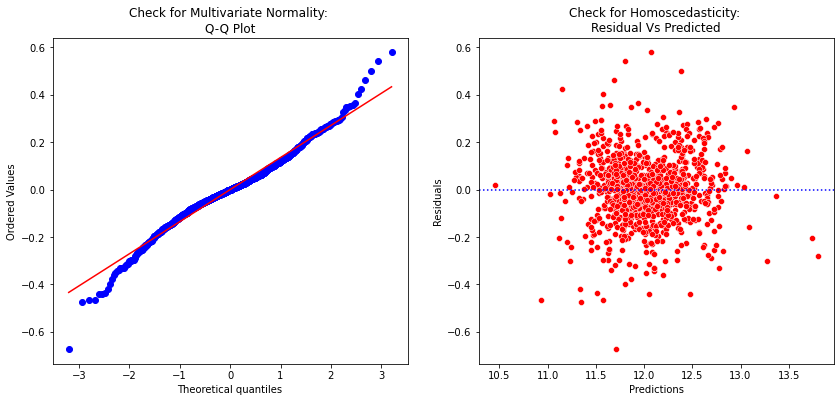

In [44]:
# Check for Multivariate Normality
#
# Quantile-Quantile plot 
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_res_train),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(y = (y_res_train), x= y_pred_train, ax = ax[1],color='r') 
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');
plt.axhline(y=0, color='b', linestyle=':')
plt.ylabel('Residuals')
plt.xlabel('Predictions')
plt.show()

- The Q-Q plot of Residuals is hugging the Straight line y=x for a large portion which represents Linearity 
- The Residuals are independent as there does not seem to be any observable pattern of error terms with Predicted values of target variable 
- We can verify the Residuals with one of the feature variable to confirm the Linearity of the model

## 7.2 Regularization

Now, We will apply two Regularization techniques on the dataset and use the cross-validation method to understand the significant features with right balance of Variance and Bias

***
###  Ridge Regression

In [45]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

 - Let's see the optimal value of alpha (Or Lambda) confirmed by Ridge regression

In [46]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_rfe, y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [47]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.05}


In [48]:
cv_results = pd.DataFrame(model_cv.cv_results_)
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('neg_mean_absolute_error')
plt.title("neg_mean_absolute_error vs alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

- Lets undertand more why Cross Validation GridCV gave us the best value of Alpha as 0.05 for Ridge Regression using accuracy and RMSE metric on training and test dataset

In [49]:
alpha_values = [0.001,0.01,0.05,0.1,1,10,100] # Different values for 𝜆 parameter
print('Ridge Regresion')
print("________________",'\n')
for i in alpha_values:
    # Fitting a ridge regression model
    ridge = Ridge(alpha=i)
    ridge.fit(X_train_rfe,y_train)
    
        # Getting perdictions
    y_pred_ridge_train = ridge.predict(X_train_rfe)
    y_pred_ridge_test = ridge.predict(X_test_rfe)


    # Evaluation
    print("At alpha = {}".format(i))
    print("The R-squared score on Training Data set is {:.4f}".format(r2_score(y_train,y_pred_ridge_train)))
    print("The Root Mean Squared Error on Training Data set is {:.4f}".format(np.sqrt(mean_squared_error(y_train,y_pred_ridge_train))))
    print("------------------",'\n')

    # Evaluation
    print("At alpha = {}".format(i))
    print("The R-squared score on Test Data set is {:.4f}".format(r2_score(y_test,y_pred_ridge_test)))
    print("The Root Mean Squared Error on Test Data set is {:.4f}".format(np.sqrt(mean_squared_error(y_test,y_pred_ridge_test))))
    print("___________________________________________________________",'\n')

Ridge Regresion
________________ 

At alpha = 0.001
The R-squared score on Training Data set is 0.8814
The Root Mean Squared Error on Training Data set is 0.1365
------------------ 

At alpha = 0.001
The R-squared score on Test Data set is 0.7743
The Root Mean Squared Error on Test Data set is 0.1927
___________________________________________________________ 

At alpha = 0.01
The R-squared score on Training Data set is 0.8809
The Root Mean Squared Error on Training Data set is 0.1368
------------------ 

At alpha = 0.01
The R-squared score on Test Data set is 0.7766
The Root Mean Squared Error on Test Data set is 0.1917
___________________________________________________________ 

At alpha = 0.05
The R-squared score on Training Data set is 0.8742
The Root Mean Squared Error on Training Data set is 0.1406
------------------ 

At alpha = 0.05
The R-squared score on Test Data set is 0.7828
The Root Mean Squared Error on Test Data set is 0.1890
____________________________________________

> - Clearly, for alpha = 0.05, The Accuracy score between Training and Test Dataset is most consistent in terms of Accuracy, Variance and Error 

- Lets create the Final Model using Ridge regularization

In [50]:
#For alpha = .05, Verify the coefficients (BETAs) which have been penalised and which are significant
alpha = .05
ridge = Ridge(alpha=alpha)
ridge.fit(X_train_rfe,y_train)
model_coefs_ridge = pd.DataFrame({'Feature':list(X_train_rfe.columns),"Coef_linear":ridge.coef_})
print('Coefficient values for training dataset \n')
ridge_coeff_df = model_coefs_ridge.sort_values(by=['Coef_linear'], ascending=False)
ridge_coeff_df

Coefficient values for training dataset 



Feature  Coef_linear
21      RoofMatl_Membran     2.850202
22        RoofMatl_Metal     2.682660
24      RoofMatl_Tar&Grv     2.523088
26      RoofMatl_WdShngl     2.495611
20      RoofMatl_CompShg     2.439739
23         RoofMatl_Roll     2.312566
25      RoofMatl_WdShake     2.265153
3               1stFlrSF     1.200618
2            TotalBsmtSF     0.823101
5              GrLivArea     0.683120
4               2ndFlrSF     0.520552
19        RoofStyle_Shed     0.515810
0                LotArea     0.501501
9            MSZoning_FV     0.491700
10           MSZoning_RH     0.457607
11           MSZoning_RL     0.442098
1             BsmtFinSF1     0.417683
7             GarageArea     0.407212
12           MSZoning_RM     0.402567
13         LandSlope_Sev    -0.182935
28       Foundation_Wood    -0.199559
14  Neighborhood_MeadowV    -0.205312
17      OverallQual_Poor    -0.236452
18      OverallCond_Fair    -0.265179
27   Exterior1st_BrkComm    -0.349521
8          YearBuilt_Age    -0.491980
29        Functional_Sev    -0.679976
6           KitchenAbvGr    -0.682643
16       Condition2_RRAe    -0.699436
15       Condition2_PosN    -1.815859

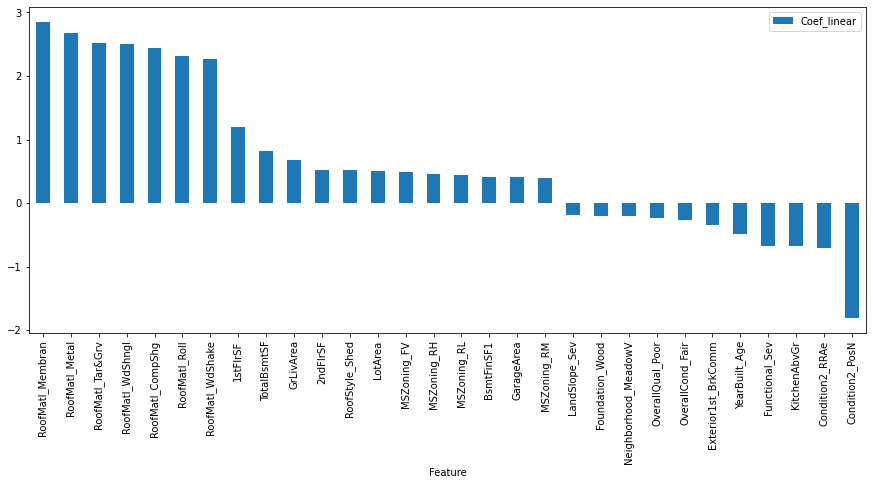

In [51]:
ridge_coeff_df.plot.bar(y='Coef_linear',x='Feature',figsize=(15, 6))
plt.show()

> From above dataframe which is sorted by the values of Coefficients, The coefficients in the middle which are close to Zero are penalized by Ridge regression the highest and deemed non-significant to large extent in explaining the Sale Price of the House

In [52]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_rfe)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2_train_lr - ',r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('r2_test_lr - ', r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('rss1_lr - ', rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('rss2_lr - ', rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('mse_train_lr - ', mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('mse_test_lr - ', mse_test_lr)
metric2.append(mse_test_lr**0.5)

r2_train_lr -  0.8742499517164362
r2_test_lr -  0.7828343834223246
rss1_lr -  20.181907218286224
rss2_lr -  15.650815665614726
mse_train_lr -  0.0197668043274106
mse_test_lr -  0.03573245585756787


***
### LASSO Regression


In [53]:
lasso = Lasso()
folds = 5
# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [54]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


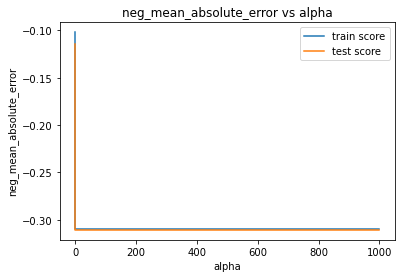

In [55]:
cv_results = pd.DataFrame(model_cv.cv_results_)
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('neg_mean_absolute_error')
plt.title("neg_mean_absolute_error vs alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [56]:
alpha_values = [0.00001,0.0001,0.001,0.01,.1,1,10,100] # Different values for 𝜆 parameter
print('LASSO Regresion')
print("________________",'\n')
for i in alpha_values:
    # Fitting a ridge regression model
    lasso = Lasso(alpha=i)
    lasso.fit(X_train_rfe,y_train)
    
        # Getting perdictions
    y_pred_lasso_train = lasso.predict(X_train_rfe)
    y_pred_lasso_test = lasso.predict(X_test_rfe)


    # Evaluation
    print("At alpha = {}".format(i))
    print("The R-squared score on Training Data set is {:.4f}".format(r2_score(y_train,y_pred_lasso_train)))
    print("The Root Mean Squared Error on Training Data set is {:.4f}".format(np.sqrt(mean_squared_error(y_train,y_pred_lasso_train))))
    print("-------------------")

    # Evaluation
    print("At alpha = {}".format(i))
    print("The R-squared score on Test Data set is {:.4f}".format(r2_score(y_test,y_pred_lasso_test)))
    print("The Root Mean Squared Error on Test Data set is {:.4f}".format(np.sqrt(mean_squared_error(y_test,y_pred_lasso_test))))
    print("___________________________________________________________",'\n')

LASSO Regresion
________________ 

At alpha = 1e-05
The R-squared score on Training Data set is 0.8813
The Root Mean Squared Error on Training Data set is 0.1366
-------------------
At alpha = 1e-05
The R-squared score on Test Data set is 0.7751
The Root Mean Squared Error on Test Data set is 0.1924
___________________________________________________________ 

At alpha = 0.0001
The R-squared score on Training Data set is 0.8752
The Root Mean Squared Error on Training Data set is 0.1401
-------------------
At alpha = 0.0001
The R-squared score on Test Data set is 0.7834
The Root Mean Squared Error on Test Data set is 0.1888
___________________________________________________________ 

At alpha = 0.001
The R-squared score on Training Data set is 0.7868
The Root Mean Squared Error on Training Data set is 0.1831
-------------------
At alpha = 0.001
The R-squared score on Test Data set is 0.7911
The Root Mean Squared Error on Test Data set is 0.1854
_________________________________________

> As confirmed from Accuracy score of Model on training and test dataset for different values of Alpha, The most robust model we obtain is when alpha = 0.0001
- Lets create the Final model using Lasso Regularization

In [57]:
#Fitting Ridge model for alpha = 0.0001, Verify the coefficients (BETAs) which have been penalised the most 
# and which are most significant
alpha = 0.0001
lasso = Lasso(alpha=alpha)        
lasso.fit(X_train_rfe, y_train) 
model_coefs_lasso = pd.DataFrame({'Feature':list(X_train_rfe.columns),"Coef_linear":lasso.coef_})
print('Coefficient values for training dataset from LASSO regression \n')
lasso_coeff_df = model_coefs_lasso.sort_values(by=['Coef_linear'], ascending=False)
lasso_coeff_df

Coefficient values for training dataset from LASSO regression 



Feature  Coef_linear
21      RoofMatl_Membran     3.024475
22        RoofMatl_Metal     2.842691
26      RoofMatl_WdShngl     2.683479
24      RoofMatl_Tar&Grv     2.673186
20      RoofMatl_CompShg     2.615120
23         RoofMatl_Roll     2.499384
25      RoofMatl_WdShake     2.493829
3               1stFlrSF     1.290460
2            TotalBsmtSF     0.850477
5              GrLivArea     0.574390
4               2ndFlrSF     0.563995
9            MSZoning_FV     0.446459
1             BsmtFinSF1     0.429211
0                LotArea     0.419095
10           MSZoning_RH     0.407906
7             GarageArea     0.406615
11           MSZoning_RL     0.398072
12           MSZoning_RM     0.357413
19        RoofStyle_Shed     0.270168
13         LandSlope_Sev    -0.130844
28       Foundation_Wood    -0.152601
14  Neighborhood_MeadowV    -0.194492
17      OverallQual_Poor    -0.207485
18      OverallCond_Fair    -0.270615
27   Exterior1st_BrkComm    -0.285951
16       Condition2_RRAe    -0.387913
8          YearBuilt_Age    -0.489271
29        Functional_Sev    -0.582501
6           KitchenAbvGr    -0.672425
15       Condition2_PosN    -1.805462

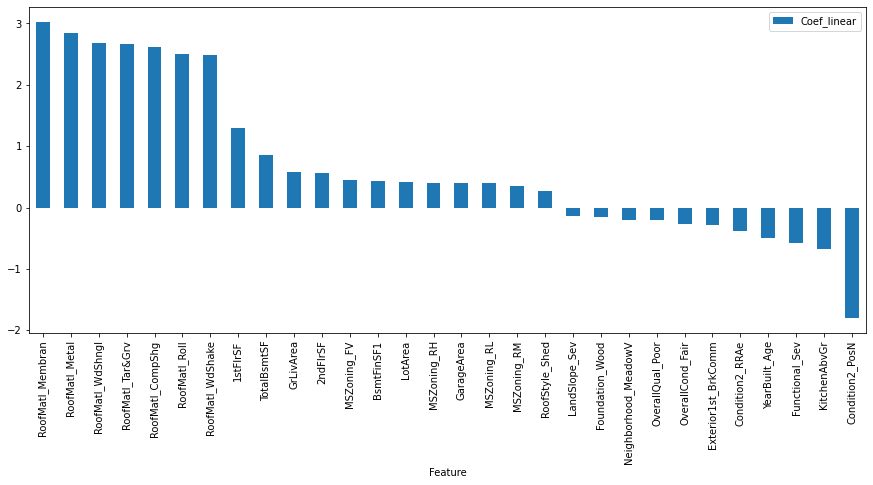

In [58]:
lasso_coeff_df.plot.bar(y='Coef_linear',x='Feature',figsize=(15, 6))
plt.show()

- We can observe that Lasso was not able to penalised any of the 30 feature columns to Zero by shringing the Beta value using penalty terms 

In [59]:
# Lets calculate some metrics such as R2 score, RSS and RMSE for Lasso this time

y_pred_train = lasso.predict(X_train_rfe)
y_pred_test = lasso.predict(X_test_rfe)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('r2_train_lr - ',r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('r2_test_lr - ', r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('rss1_lr - ', rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('rss2_lr - ', rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('mse_train_lr - ', mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('mse_test_lr - ', mse_test_lr)
metric3.append(mse_test_lr**0.5)

r2_train_lr -  0.8751829840031775
r2_test_lr -  0.7834226434509817
rss1_lr -  20.032162774449368
rss2_lr -  15.608420605949895
mse_train_lr -  0.019620139837854426
mse_test_lr -  0.03563566348390387


In [60]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)           0.881406          0.874250          0.875183
1   R2 Score (Test)           0.773954          0.782834          0.783423
2       RSS (Train)          19.033372         20.181907         20.032163
3        RSS (Test)          16.290788         15.650816         15.608421
4       MSE (Train)           0.136535          0.140594          0.140072
5        MSE (Test)           0.192856          0.189030          0.188774

- Lasso Regularization provided a more genarlizable and robust model with Lowe variance and Error on Test dataset

## 8. Betas 

In [61]:
betas = pd.DataFrame(index=X_train_rfe.columns)

In [62]:
betas.rows = X_train.columns
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
betas.index.name = 'Features'
betas = betas.reset_index()

In [63]:
pd.set_option('display.max_rows', None)
betas['Predictor'] = betas['Features'].apply(lambda x:x.split('_')[0])
betas.sort_values(by=['Lasso'],ascending=False)

Features    Linear     Ridge     Lasso     Predictor
21      RoofMatl_Membran  4.232178  2.850202  3.024475      RoofMatl
22        RoofMatl_Metal  4.072426  2.682660  2.842691      RoofMatl
26      RoofMatl_WdShngl  3.619394  2.495611  2.683479      RoofMatl
24      RoofMatl_Tar&Grv  3.717610  2.523088  2.673186      RoofMatl
20      RoofMatl_CompShg  3.582750  2.439739  2.615120      RoofMatl
23         RoofMatl_Roll  3.570114  2.312566  2.499384      RoofMatl
25      RoofMatl_WdShake  3.418606  2.265153  2.493829      RoofMatl
3               1stFlrSF  1.536049  1.200618  1.290460      1stFlrSF
2            TotalBsmtSF  0.967417  0.823101  0.850477   TotalBsmtSF
5              GrLivArea  0.307477  0.683120  0.574390     GrLivArea
4               2ndFlrSF  0.694872  0.520552  0.563995      2ndFlrSF
9            MSZoning_FV  0.508994  0.491700  0.446459      MSZoning
1             BsmtFinSF1  0.522711  0.417683  0.429211    BsmtFinSF1
0                LotArea  0.655855  0.501501  0.419095       LotArea
10           MSZoning_RH  0.470797  0.457607  0.407906      MSZoning
7             GarageArea  0.384661  0.407212  0.406615    GarageArea
11           MSZoning_RL  0.446834  0.442098  0.398072      MSZoning
12           MSZoning_RM  0.415765  0.402567  0.357413      MSZoning
19        RoofStyle_Shed  0.659386  0.515810  0.270168     RoofStyle
13         LandSlope_Sev -0.303507 -0.182935 -0.130844     LandSlope
28       Foundation_Wood -0.216912 -0.199559 -0.152601    Foundation
14  Neighborhood_MeadowV -0.197619 -0.205312 -0.194492  Neighborhood
17      OverallQual_Poor -0.216477 -0.236452 -0.207485   OverallQual
18      OverallCond_Fair -0.266902 -0.265179 -0.270615   OverallCond
27   Exterior1st_BrkComm -0.361767 -0.349521 -0.285951   Exterior1st
16       Condition2_RRAe -0.898826 -0.699436 -0.387913    Condition2
8          YearBuilt_Age -0.471801 -0.491980 -0.489271     YearBuilt
29        Functional_Sev -0.774392 -0.679976 -0.582501    Functional
6           KitchenAbvGr -0.695936 -0.682643 -0.672425  KitchenAbvGr
15       Condition2_PosN -2.027905 -1.815859 -1.805462    Condition2

## 9. Inference

1. The Linear model have high accuracy on Training Data but it drops significantly on test dataset which shows the model built using simple linear regression will have High variance

2. The most effective model after Regularization is Lasso which performs slightly better than Ridge in terms of Accurancy and Robust with less Variance. 

> Optimal Alpha value for Ridge Regression 
> - $\alpha$ = .05

> Optimal Alpha value for Lasso Regression 
> - $\alpha$ = .0001


3. Most Signifcant features as per Linear , Ridge and Lasso are the one which have highest absolute value in the above table of Betas
> - 1. 'RoofMatl' or _Roof material_ affects the Sale Price of the House the most
> - 2. 'Condition2_PosN' Or _Near positive off-site feature--park, greenbelt, etc._ in reverse manner
> - 3. '1stFlrSF' or _First Floor Surface Area_
> - 4. 'TotalBsmtSF' Or _Total basement Surface Area_ have the next highest Beta value 
> - 5. 'KitchenAbvGr' or _Kitchens above grade_

***

***
## Conclusion

#### 1. Which variables are significant in predicting the price of a house 

##### The most signifcant variables in predicting the Sale Price of the House in order are : - 

> 1. RoofMatl
> 2. Condition2
> 3. 1stFlrSF
> 4. TotalBsmtSF
> 5. KitchenAbvGr

***
#### 2. How well those variables describe the price of a house. 

##### The absolute magnitude of the Beta coefficient defines how significantly the feature variables describe the Sale price of the house. Following is the table which shows this :- 

In [64]:
betas_sorted_lasso = betas.sort_values(by=['Lasso'],ascending=False,key=pd.Series.abs).head(15)
betas_sorted_lasso

Features    Linear     Ridge     Lasso     Predictor
21  RoofMatl_Membran  4.232178  2.850202  3.024475      RoofMatl
22    RoofMatl_Metal  4.072426  2.682660  2.842691      RoofMatl
26  RoofMatl_WdShngl  3.619394  2.495611  2.683479      RoofMatl
24  RoofMatl_Tar&Grv  3.717610  2.523088  2.673186      RoofMatl
20  RoofMatl_CompShg  3.582750  2.439739  2.615120      RoofMatl
23     RoofMatl_Roll  3.570114  2.312566  2.499384      RoofMatl
25  RoofMatl_WdShake  3.418606  2.265153  2.493829      RoofMatl
15   Condition2_PosN -2.027905 -1.815859 -1.805462    Condition2
3           1stFlrSF  1.536049  1.200618  1.290460      1stFlrSF
2        TotalBsmtSF  0.967417  0.823101  0.850477   TotalBsmtSF
6       KitchenAbvGr -0.695936 -0.682643 -0.672425  KitchenAbvGr
29    Functional_Sev -0.774392 -0.679976 -0.582501    Functional
5          GrLivArea  0.307477  0.683120  0.574390     GrLivArea
4           2ndFlrSF  0.694872  0.520552  0.563995      2ndFlrSF
8      YearBuilt_Age -0.471801 -0.491980 -0.489271     YearBuilt

- The top five predictors which best describes the Sale Price of the house are as below 

In [65]:
pd.DataFrame(betas_sorted_lasso.Predictor.unique()).head(5).rename(columns={0: "Top 5 Predictors-Lasso"})

Top 5 Predictors-Lasso
0               RoofMatl
1             Condition2
2               1stFlrSF
3            TotalBsmtSF
4           KitchenAbvGr

***

# END
- Dated - 21 July 2021
- Regards
- Abhishek Singh 